In [33]:
import mo_gymnasium as gym
import neat
import random
import numpy as np
import matplotlib.pyplot as plt

In [34]:
config_path = 'neat.config'
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction, neat.DefaultSpeciesSet, neat.DefaultStagnation, config_path)

In [44]:
env = gym.make("water-reservoir-v0", normalized_action=True)

obs, info = env.reset()

In [45]:


def evaluate_genome(genome, config):
    net = neat.nn.RecurrentNetwork.create(genome, config)

    fitness = 0
    genome.fitness = 0
    # Fitness is a 3D-vector
    for i in range(1):
        next_obs, info = env.reset()
        for t in range(1000):
            output = net.activate(next_obs)
            action = np.clip(output,0,1)
        
            next_obs, vector_reward, terminated, truncated, info = env.step(action)
            reward = 1 * vector_reward[0] +1*vector_reward[1]
            fitness += reward

            if terminated or truncated:
                break
    genome.fitness = float(fitness)

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        evaluate_genome(genome, config)


 ****** Running generation 0 ****** 

Population's average fitness: -10102.83530 stdev: 37.15677
Best fitness: -10005.82617 - size: (2, 0) - species 1 - id 113
Average adjusted fitness: 0.477
Mean genetic distance 5.076, standard deviation 1.408
Population of 150 members in 38 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    85  -10005.8    0.477     0
     2    0     3       --       --     0
     3    0     2       --       --     0
     4    0     1       --       --     0
     5    0     1       --       --     0
     6    0     1       --       --     0
     7    0     4       --       --     0
     8    0     1       --       --     0
     9    0     2       --       --     0
    10    0     1       --       --     0
    11    0     1       --       --     0
    12    0     1       --       --     0
    13    0     1       --       --     0
    14    0     3       --       --     0
    15    0     3       --       --    

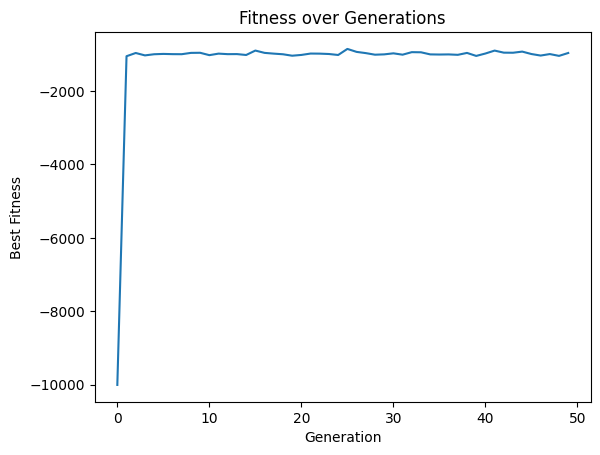

In [46]:
random.seed(42)

p = neat.Population(config)

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)

def plot_fitness(stats):
    generation = range(len(stats.most_fit_genomes))
    best_fitness = [c.fitness for c in stats.most_fit_genomes]
    plt.plot(generation, best_fitness)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title('Fitness over Generations')
    plt.show()


# Run for up to 300 generations.
winner = p.run(eval_genomes, 50)

# Display the winning genome.
print('\nBest genome:\n{!s}'.format(winner))
plot_fitness(stats)
    

In [18]:
eval_episodes = 100
eval_seed_offset = 1000
eval_rewards = []
for j in range(eval_episodes):
    net = neat.nn.RecurrentNetwork.create(winner, config)
    obs, info = env.reset(seed=(eval_seed_offset + j))
    sum_reward = 0
    done = False
    steps = 0
        
    while not done and steps <= 1000:
        output = net.activate([obs])
        action = np.argmax(output)
        next_obs, reward, terminated, truncated, info = env.step(action)
        sum_reward += reward
        obs = next_obs
        done = terminated or truncated
        steps += 1
        
    eval_rewards.append(sum_reward)

mean_reward = np.mean(eval_rewards)

print(mean_reward)

-200.0


In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(100, mean_reward)
plt.xlabel('Episodes')
plt.ylabel('Mean Evaluation Reward')
plt.title('Mean Evaluation Reward vs. Episodes')
plt.grid(True)

AttributeError: module 'matplotlib' has no attribute 'figure'